In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Colonnes extraites de adult.names
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

# Charger le fichier d'entraînement
df_train = pd.read_csv("adult/adult.data", names=columns, sep=',', skipinitialspace=True)

# Charger le fichier de test
df_test = pd.read_csv("adult/adult.test", names=columns, sep=',', skipinitialspace=True, skiprows=1)

# Concaténer les deux fichiers pour une base unique
df = pd.concat([df_train, df_test], ignore_index=True)


# Nettoyage income (supprimer le point à la fin pour les données test)
#df['income'] = df['income'].apply(lambda x: x.replace('.', '') if isinstance(x, str) else x)


In [54]:
# Taille
print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])
# Types
print("\nTypes des colonnes :\n", df.dtypes)

Nombre de lignes : 48842
Nombre de colonnes : 15

Types des colonnes :
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [55]:
# Aperçu
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [56]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,24720
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [57]:
df.replace('?', np.nan, inplace=True)

print(df.isnull().sum())

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


Colonnes avec valeurs manquantes :
workclass         2799
occupation        2809
native-country     857
dtype: int64


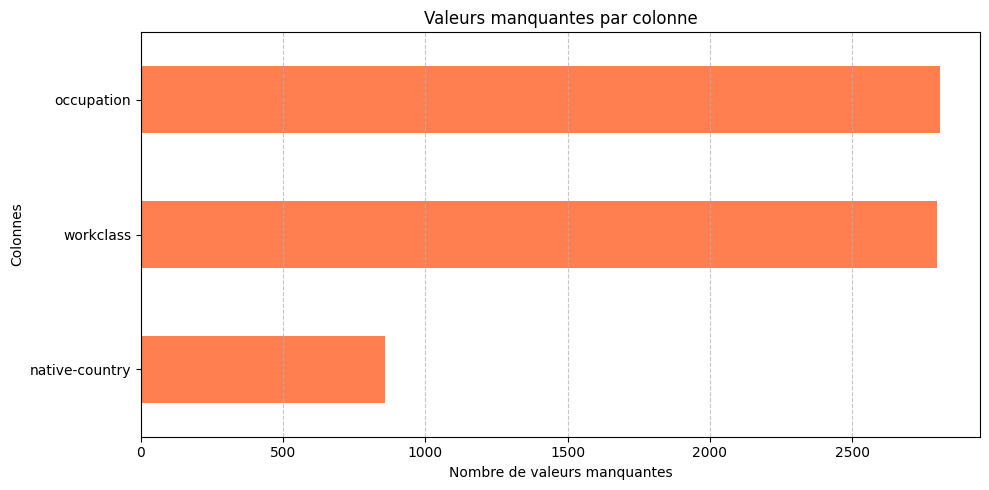

In [58]:
import matplotlib.pyplot as plt

# Calcul du nombre de valeurs manquantes par colonne
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

# Affichage graphique
plt.figure(figsize=(10, 5))
missing_counts.sort_values().plot(kind='barh', color='coral')
print("Colonnes avec valeurs manquantes :")
print(missing_counts)

plt.title("Valeurs manquantes par colonne")
plt.xlabel("Nombre de valeurs manquantes")
plt.ylabel("Colonnes")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [59]:
print(f"Nombre de doublons : {df.duplicated().sum()}")

Nombre de doublons : 29


In [60]:
# Remplacer les valeurs manquantes 
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

In [61]:
print(df.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [62]:
#Supprimer les doublons
print(f"Nombre de doublons avant suppression : {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Nombre de doublons après suppression : {df.duplicated().sum()}")

Nombre de doublons avant suppression : 29
Nombre de doublons après suppression : 0


In [63]:
# Encoder la variable cible 'income' en binaire
df['income'] = df['income'].apply(lambda x: 1 if '>50K' in x else 0)

In [64]:
# Encoder les variables catégoriques (One-Hot Encoding)
df_encoded = pd.get_dummies(df.drop('income', axis=1))

In [65]:
# Finalement, X et y prêts pour le modèle
X = df_encoded
y = df['income']


In [66]:
print("Données nettoyées et prêtes pour modélisation.")
print(X.head())
print(y.head())

Données nettoyées et prêtes pour modélisation.
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                  False                False                   False   
1                  False                False                   False   
2                  False                False                   False   
3                  False                False                   False   
4                  False                False                   False   

   workclass_Private  ...  native-country_Portugal 

In [67]:
# Feature Engineering
# Tranches d'âge
bins = [0, 25, 45, 65, 100]
labels = ['Jeune', 'Adulte', 'Senior', 'Très Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Capital net
df['capital_net'] = df['capital-gain'] - df['capital-loss']

#  Heures longues de travail
df['travail_long'] = (df['hours-per-week'] > 40).astype(int)

#  Regroupement pays
top_countries = df['native-country'].value_counts().nlargest(5).index
df['native_country_grouped'] = df['native-country'].apply(lambda x: x if x in top_countries else 'Autres')

#  Mariage
married_status = ['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent']
df['married'] = df['marital-status'].apply(lambda x: 1 if x in married_status else 0)

# Expérience estimée
df['experience_years'] = df['age'] - df['education-num'] - 6
df['experience_years'] = df['experience_years'].apply(lambda x: max(x, 0))

print(df[['age', 'age_group', 'capital_net', 'travail_long', 'native_country_grouped', 'married', 'experience_years']].head())


   age age_group  capital_net  travail_long native_country_grouped  married  \
0   39    Adulte         2174             0          United-States        0   
1   50    Senior            0             0          United-States        1   
2   38    Adulte            0             0          United-States        0   
3   53    Senior            0             0          United-States        1   
4   28    Adulte            0             0                 Autres        1   

   experience_years  
0                20  
1                31  
2                23  
3                40  
4                 9  


In [68]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,capital-loss,hours-per-week,native-country,income,age_group,capital_net,travail_long,native_country_grouped,married,experience_years
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,0,Adulte,2174,0,United-States,0,20
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,0,Senior,0,0,United-States,1,31
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,0,Adulte,0,0,United-States,0,23
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,0,Senior,0,0,United-States,1,40
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,0,Adulte,0,0,Autres,1,9


In [69]:
#Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
#Select Modeling Technique
model = RandomForestClassifier(random_state=42)
#Generate Test Design
X = df.drop('income', axis=1)
y = df['income']

# Encodage des variables catégorielles si besoin
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
#Build Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

c:\Users\Rania\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [71]:
#Assess Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8495339547270306
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7375
           1       0.74      0.60      0.66      2388

    accuracy                           0.85      9763
   macro avg       0.81      0.77      0.78      9763
weighted avg       0.84      0.85      0.84      9763



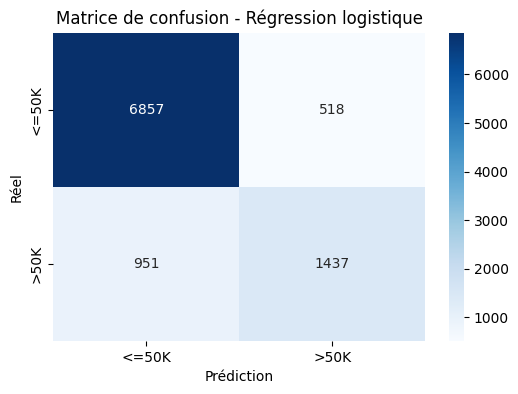

In [72]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion - Régression logistique')
plt.show()